# Project 2a: Alloy cluster expansions

In this project you will explore different methods for constructing an alloy cluster expansion model for the Au-Cu alloy, using various levels of physical intuition in the model construction process.
This physical intuition will be instilled through more and more complex priors, ranging from the completely uninformative prior of OLS to a full Bayesian analysis where the prior hyperparameters are sampled as well.
The different cluster expansion models are then applied to the problem of predicting the ground state structure amongst a few different candidates.

Note that it is not required for you to understand all the details of the cluster expansion (CE) formalism to solve the project.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references).
Do not attach any appendices.
In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.
Your code should run without errors and upon inspection reproduce the main results you present in the report.
We will award extra points for code that we deem well written and structures (but we will not deduct points in the opposite case).
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.
Please use the LaTeX template for reports that is provided on the homepage.**

**<font color=red>DEADLINE: Tuesday, Dec 3, 23:59</font>**


## Alloys
In order to study alloys on the atomic scale one can resort to density functional theory (DFT) calculations.
DFT can provide the energy of a given atomistic structure with high accuracy.
The database that we provide you with is based on DFT calculations.

The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Au} E_\text{Au} - n_\text{Cu} E_\text{Cu}}{n_\text{Au} + n_\text{Cu}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Au}$ number of Au atoms in the structure and $E_\text{Au}$ the energy of pure Au.
Working with the mixing energy is often convient as it is the relevant energy when considering, e.g., phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img configurations.png" alt="Drawing" style="width: 750px;"/>





## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ unique ways of occupaying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered for, e.g., thermodynamic averages or ground state searches.

Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
One of the more common atomistic models to employ is the alloy cluster expansion.


## Cluster expansions
The alloy cluster expansion is a model based on a perfect lattice.
This lattice can be occupied by various chemical species (Au and Cu in our case).
In this approach the energy of the atomic structure is modeled as a sum over the orbits times their corresponding effective cluster interaction.
In principle it looks like
\begin{equation}
\large
E_{mix} = J_0 + \sum_\alpha m_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to different orbits such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $m_\alpha$ is the multiplicity, i.e. the number of symmetry equivalent clusters in the orbit per unit cell, and $J_\alpha$ is the corresponding effective cluster interaction (ECI).
In this project, we are not concerned with the details of decomposing a structure into orbits but simply use the [`icet` package](https://icet.materialsmodeling.org) for this purpose.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>


Instead we focus on how to determine the unknown parameters (ECIs) for the cluster expansion model, and how to choose which type of clusters (orbits) to include in the model.
The equation above can be formulated as a dot product by defining $\boldsymbol{\xi}=[1, N_1, N_2, ...]$ and $\boldsymbol{J}=[J_0, J_1, J_2, ...]$ as $E_{mix} = \boldsymbol{\xi} \boldsymbol{J}$.
Here, $\boldsymbol{\xi}$ is often refered to the cluster vector of the given configuration.

If the mixing energy, $E_{mix}$, is provided, e.g., from DFT calculations, for a set of configurations, then the problem of finding the ECIs, $\boldsymbol{J}$, can be cast in the form of OLS
\begin{equation}
\large
\boldsymbol{J}_{opt} = \min_{\boldsymbol{J}} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E_{mix}} ||_2^2, 
\end{equation}
where $\boldsymbol{E_{mix}}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix where each row corresponds to a cluster vector one of the given structures.


## The linear problem
Simplest way to solve the linear problem would be to use ordinary least-squares (OLS). However, OLS tends to overfit and thus linear regression with regularization such as Ridge and LASSO are feasible alternatives.

A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model. Features in our problem would corresponds to clusters with various interatomic distances and order. Too few can lead to underfitting and too many to overfitting.

In this project you will construct cluster-expansion model using linear regression methods such as Lasso and ARDR. You will use cross-validation but also information criteria such as AIC and BIC in order to evaluate how many features is reasonable to include in your cluster expansion. For more information and details about these methods and metrics, see the lecture notes.

Lastly, you will see how bayesian parameter estimation of the ECIs can be used for cluster-expansion.

### Cross validation
You may freely chose a suitable cross-valdation method to use for the following tasks. K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Ten folds might be a good starting point to try out.

### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 log(L_*) - N_p log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{\xi} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d log(\text{MSE}) - N_p log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms like OLS, Ridge, ARDR (and many more) are available in `sklearn`. One can also use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `sklearn` to standardize data.

*Note: Since we're including the constant term in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
For more information, see the lecture notes as well as the demos.
For Task 3, a similar analysis is performed in the notebook `ce-with-covariance-matrix.ipynb`.

Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* Robust data-driven approach for predicting the configurational energy of high entropy alloys (doi.org/10.1016/j.matdes.2019.108247)
* [`icet`](https://icet.materialsmodeling.org) – A Python Library for Constructing and Sampling Alloy Cluster Expansions (doi.org/10.1002/adts.201900015)
* Covariance regularization by Mueller et al. [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103)

In this project, you are provided with data in the form of [ASE databases](https://wiki.fysik.dtu.dk/ase/ase/db/db.html). Please see the notebook `introduction-to-ase.ipynb` for further details on how to read such databases and an introduction to ASE in general, and the notebook `introduction-to-cluster-expansions.ipynb` for tips on working with cluster expansions.

## Setup

In [30]:
import ase
import icet

import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
sns.set_context('notebook')

In [31]:
# Set some default plotting parameters

plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 13


## Task 1: Prepare data (1.5p)

The data can be found in the ASE database `AuCu-structures.db`.
Here each row corresponds to an atomic structure with an attached mixing energy in units of eV per atom.
Use fixed cutoff radii of 8 Å, 6 Å, and 5 Å for pairs, triplets, and quadruplets.

**Task:**
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Cu concentration
* Standardize the mixing energy $E$ and the cluster vectors $X$.

**Discuss:**
* Why is it good practice to standardize the data? Is it necessary in this case?

*Hints:*
- The mixing energy for a structure can be retrieved by accessing the `mixing_energy` field on the row corresponding to that structure, like `E_mix = row.mixing_energy`.

====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 8.0000 6.0000 5.0000
 total number of parameters             : 24
 number of parameters by order          : 0= 1  1= 1  2= 7  3= 12  4= 3
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
-------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]          |      A     


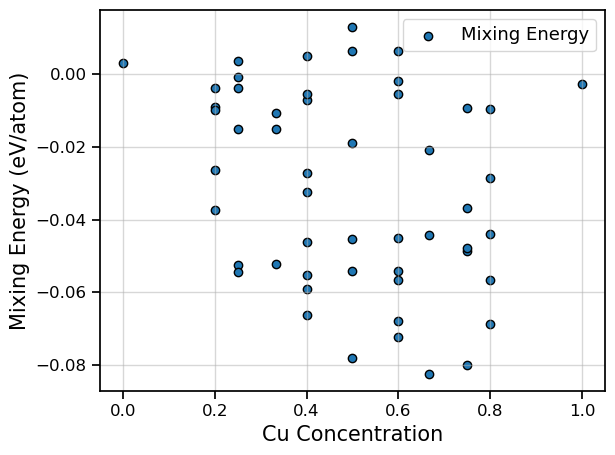

Standardized Mixing Energies (first 5): [1.29198411 1.07689795 1.65618544 0.60805466 0.39270787]
Standardized Cluster Vectors (shape): (52, 24)


In [ ]:

from ase.db import connect
from sklearn.preprocessing import StandardScaler

db = connect('AuCu-structures.db')
prim = db.get(id=1).toatoms()
prim.pbc = True
cs = icet.ClusterSpace(prim, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])
print(cs)

# Create pandas data frame to store the data
df = cs.to_dataframe()

cu_concentrations = []
mixing_energies = []
cluster_vectors = []

# Iterate over all structures in the database
for row in db.select():
    atoms = row.toatoms()

    # Compute Cu concentration
    n_cu = atoms.get_chemical_symbols().count('Cu')
    n_total = len(atoms)
    cu_concentration = n_cu / n_total

    # Compute cluster vector
    cluster_vector = cs.get_cluster_vector(atoms)

    cu_concentrations.append(cu_concentration)
    mixing_energies.append(row.mixing_energy)
    cluster_vectors.append(cluster_vector)

cu_concentrations = np.array(cu_concentrations)
mixing_energies = np.array(mixing_energies)
cluster_vectors = np.array(cluster_vectors)

# Standardize mixing energies and cluster vectors
def standardize_X_E():
    energy_scaler = StandardScaler()
    standardized_mixing_energies = energy_scaler.fit_transform(mixing_energies.reshape(-1, 1)).flatten()
    cluster_scaler = StandardScaler()
    standardized_cluster_vectors = cluster_scaler.fit_transform(cluster_vectors)
    return standardized_cluster_vectors, standardized_mixing_energies, cluster_scaler, energy_scaler

standardized_cluster_vectors, standardized_mixing_energies, cluster_scaler, energy_scaler = standardize_X_E()
print(standardized_cluster_vectors.shape, standardized_mixing_energies.shape)

# Plot Mixing Energy vs Cu Concentration
plt.figure()
plt.grid(alpha=0.5)
plt.scatter(cu_concentrations, mixing_energies, label="Mixing Energy",edgecolors='black')
plt.xlabel("Cu Concentration")
plt.ylabel("Mixing Energy (eV/atom)")
plt.legend()
plt.tight_layout()
plt.savefig("MixingEnergy_vs_CuConcentration.pdf")
plt.show()

# Print summaries
print("Standardized Mixing Energies (first 5):", standardized_mixing_energies[:5])
print("Standardized Cluster Vectors (shape):", standardized_cluster_vectors.shape)

In [33]:
for row in db.select(limit=5):  # Check the first 5 rows
    atoms = row.toatoms()
    cluster_vector = cs.get_cluster_vector(atoms)
    print("Cluster Vector Shape:", cluster_vector.shape)  # Should be (24,)
    print("Cluster Vector (First 5 Values):", cluster_vector[:5])


Cluster Vector Shape: (24,)
Cluster Vector (First 5 Values): [1. 1. 1. 1. 1.]
Cluster Vector Shape: (24,)
Cluster Vector (First 5 Values): [ 1. -1.  1.  1.  1.]
Cluster Vector Shape: (24,)
Cluster Vector (First 5 Values): [ 1.  0.  0. -1.  0.]
Cluster Vector Shape: (24,)
Cluster Vector (First 5 Values): [ 1.          0.33333333  0.33333333 -0.33333333  0.        ]
Cluster Vector Shape: (24,)
Cluster Vector (First 5 Values): [ 1.         -0.33333333  0.33333333 -0.33333333  0.        ]


## Task 2: OLS and ridge regression (2p)

Use OLS and ridge to fit the ECIs. You may use routines from, e.g., scikit-learn.

Ridge regression uses a hyperparameter $\alpha$ to penalize large values for the ECIs, by using the following loss function:

$$
L = ||E - XJ||^2 + \alpha ||J||^2
$$

where $E$ is the mixing energy and $x$ the design matrix of cluster vectors and $J$ the ECIs. The solution $J_{opt}$ that minimizes $L$  can then be written as:

$$
J_{opt, Ridge} = (X^T X + \alpha I)^{-1} X^T E
$$

**Tasks**
* Fit ECIs using OLS and ridge regression
    * Use k-fold cross validation to find a good value for $\alpha$.
* Compare the CV-RMSE and size of the ECIs between OLS and Ridge. The ECIs can for instance be plotted in a bar chart.

**Discuss**
* What are the qualitative differences between OLS and Ridge?

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

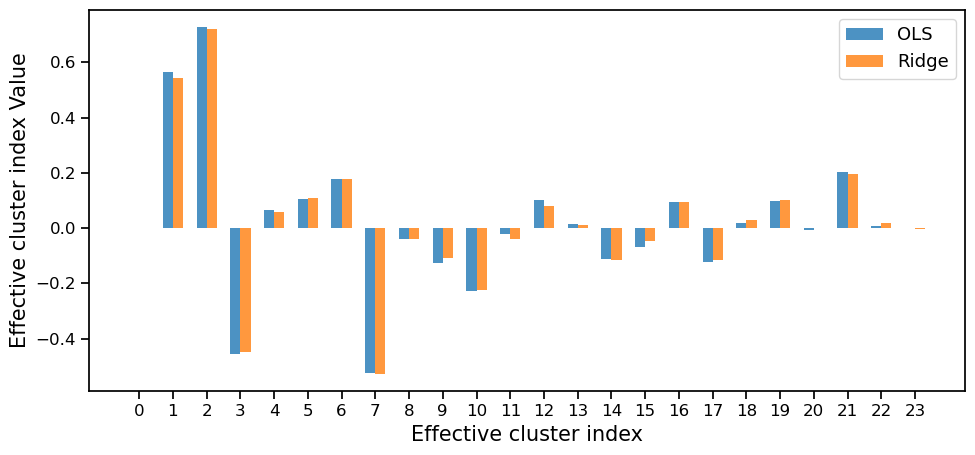

OLS CV-RMSE: 0.1060
Ridge CV-RMSE: 0.1057
Best Alpha for Ridge: 0.0794


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Prepare the data
X,E,_,_ = standardize_X_E()
# Define k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True,random_state=42)

# 1. OLS Regression
ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(X, E)  # Fit the model
ols_cv_rmse = -cross_val_score(ols_model, X, E, cv=kf, scoring="neg_root_mean_squared_error").mean()

# 2. Ridge Regression with Cross-Validation for Alpha
alphas = np.logspace(-3, 3, 500)
ridge_cv_rmses = []

# Iterate over alphas
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, fit_intercept=False)
    cv_rmse = -cross_val_score(ridge_model, X, E, cv=kf, scoring="neg_root_mean_squared_error").mean()
    ridge_cv_rmses.append(cv_rmse)

# Find the best alpha
best_alpha = alphas[np.argmin(ridge_cv_rmses)]
ridge_model = Ridge(alpha=best_alpha, fit_intercept=False)
ridge_model.fit(X, E)

# Calculate final RMSE for Ridge
ridge_cv_rmse = min(ridge_cv_rmses)

# 3. Compare ECIs
ols_ecis = ols_model.coef_
ridge_ecis = ridge_model.coef_

# Plot ECIs
indices = np.arange(len(ols_ecis))
bar_width = 0.3

plt.figure().set_figwidth(10)
plt.bar(indices - bar_width / 2, ols_ecis, bar_width, label="OLS", alpha=0.8)
plt.bar(indices + bar_width / 2, ridge_ecis, bar_width, label="Ridge", alpha=0.8)

# Add axis labels, title, legend, and grid
plt.xlabel("Effective cluster index")
plt.ylabel("Effective cluster index Value")
plt.xticks(indices)
plt.legend()
plt.tight_layout()
plt.savefig("Comparison_of_ECIs_OLS_vs_Ridge.pdf")
plt.show()

# Print Results
print(f"OLS CV-RMSE: {ols_cv_rmse:.4f}")
print(f"Ridge CV-RMSE: {ridge_cv_rmse:.4f}")
print(f"Best Alpha for Ridge: {best_alpha:.4f}")


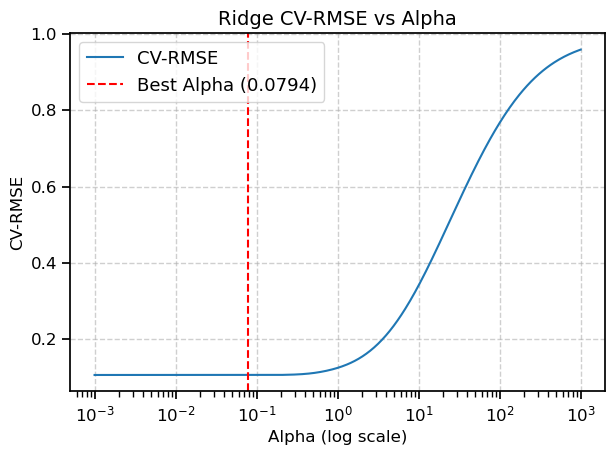

In [ ]:
# Plot Ridge CV-RMSE vs Alpha
plt.figure()
plt.plot(alphas, ridge_cv_rmses, label="CV-RMSE")
plt.axvline(best_alpha, color="r", linestyle="--", label=f"Best Alpha ({best_alpha:.4f})")

# Add axis labels, title, legend, and grid
plt.xlabel("Alpha (log scale")
plt.ylabel("CV-RMSE")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("Ridge_CV_RMSE_vs_Alpha.pdf")
plt.show()


In [37]:
# Print Summary Outputs
print(f"OLS CV-RMSE: {ols_cv_rmse:.4f}")
print(f"Ridge CV-RMSE: {ridge_cv_rmse:.4f}")
print(f"Best Alpha for Ridge: {best_alpha:.4f}")
print("\nOLS ECIs (first 5):", ols_ecis[:5])
print("Ridge ECIs (first 5):", ridge_ecis[:5])


OLS CV-RMSE: 0.1060
Ridge CV-RMSE: 0.1057
Best Alpha for Ridge: 0.0794

OLS ECIs (first 5): [ 0.          0.56584728  0.72654888 -0.45498171  0.06460606]
Ridge ECIs (first 5): [ 0.          0.54253739  0.72102152 -0.44791905  0.05986321]


## Task 3: Covariance matrix for cluster similarity (4p)

Ridge regression regularizes parameters by using the $\alpha$ to penalize larger absolute values of the ECIs. This is a very general approach that works for a broad range of problems, and can be motivated by physical intuition in that smaller parameter values are favored. However, we can improve upon Ridge regression by creating more elaborate regularization schemes that inlcude physical intuition about our specific system.

One example of such physical intuition is that we expect cluster orbits with more sites and with a larger distance between them to contribute less to the overall energy of the structure than smaller/more compact clusters. In other words, we expect that the ECIs decrease with the number of sites and the size of a orbit. Following the approach outlined Mueller et al. in [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103), this can be achieved by modifying the Ridge least-squares estimator as follows:

$$
J_{opt, Cov} = (X^T X + \Lambda)^{-1} X^T E.
$$

Here, $\Lambda$ is known as the *regularization matrix*. Using this regularization matrix is the same as using the following prior over the ECIs

$$
P(J|X) \propto e^{-J^T \Lambda J /2}.
$$

This is a multivariate normal distribution over the components of $J$ with covariance $\Lambda^{-1}$, and hence we can interpret $\Lambda$ to be the inverse of the covariance matrix for the prior distribution  of $J$. By modifying $\Lambda$, we can thus encode physical intuition similarly to how we usually specify priors in a fully Bayesian approach.

The elements of $\Lambda$ are given by
$$
\Lambda_{\alpha,\alpha} = \frac{\sigma^2}{\sigma_\alpha^2} + \sum_{\beta | \beta\neq\alpha} \frac{\sigma^2}{\sigma_{\alpha\beta}}\\
\Lambda_{\alpha\beta} = \Lambda_{\beta\alpha} = - \frac{\sigma^2}{\sigma_{\alpha\beta}^2}.
$$

It is useful to consider the extremal cases for the elements of $\Lambda$, using the reduced values $\lambda_{\alpha}=\sigma^2/\sigma_\alpha^2$ and  $\lambda_{\alpha\beta}=\sigma^2/\sigma_{\alpha\beta}^2$.

1. $\lambda_{\alpha} \rightarrow \infty$: force ECI for orbit $\alpha$ to zero (= remove orbit)
1. $\lambda_{\alpha} \rightarrow 0$ and $\lambda_{\alpha\beta} \rightarrow 0$: all ECIs/orbits are equally likely; this recovers OLS
1. $\lambda_{\alpha\beta} \rightarrow 0$: no correlation (coupling) between orbits; this recovers ridge regression if $\lambda_\alpha$ is the same for all orbits
1. $\lambda_{\alpha\beta} \rightarrow \infty$: force two orbits to have the same ECI

In this project we will only focus on the diagonal elements $\lambda_\alpha$, and set the off-diagonal elements $\lambda_{\alpha\beta}=0$. We will thus not merge any cluster orbits. Merging cluster orbits has the benefit of constraining the parameter space, simplifying optimization procedure. See the demo `cluster-expansion-construction` for details.

We can thus encode our prior information/physical intuition that orbits with more sites/larger size should have smaller ECIs by modifying the parameters $\lambda_\alpha$. To demonstrate this approach, we calculate $\lambda_\alpha$ according to the following (linear) regularization scheme

$$
\lambda_\alpha(n,r, \gamma) = \gamma_1r+\gamma_2n,
$$

where $n$ and $r$ is the number of sites and radius of orbit $\alpha$ respectively. $\lambda_\alpha$ grows with larger $n$ and $r$, decreasing the size of that ECI. The problem is now reduced to finding the two optimal hyperparameters $\gamma$, instead of finding all the $\lambda_\alpha$ individually.

**Tasks:**
* Find the hyperparameters $\gamma$ that minimizes the CV-RMSE of the model with $J_{opt, Cov}$.
* Compare the CV-RMSE and the ECIs to OLS and Ridge from Task 2.

**Discuss:**
* What is the interpretation of having an individual parameter $\lambda_\alpha$ for each orbit? How does this compare to Ridge regression?
* How does the CV-RMSE and the ECIs compare to OLS and Ridge? Can you explain it?

*Hints*
* You can use, e.g., [`scipy.minimize.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to optimize the hyperparameters $\gamma$.

In [39]:
# Extract radii and number of sites from orbit_list
radii = df['radius'].to_numpy()  # Access radius attribute
num_sites = df['order'].to_numpy()  # Count the number of sites in each orbit
num_sites[0] = 1  # The first orbit has only one site

print("Radii:", radii, radii.shape)
print("Number of Sites:", num_sites, num_sites.shape)

Radii: [0.         0.         1.44695012 2.04629648 2.50619112 2.89390023
 3.23547882 3.54428947 3.82827017 1.67079408 1.89272314 1.92926682
 2.02299788 2.30918465 2.50443295 2.65316072 2.67671473 2.7182663
 2.89390023 3.04234983 3.34158816 1.77214474 1.89408229 2.04629648] (24,)
Number of Sites: [1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4] (24,)


Radii: [0.         0.         1.44695012 2.04629648 2.50619112 2.89390023
 3.23547882 3.54428947 3.82827017 1.67079408 1.89272314 1.92926682
 2.02299788 2.30918465 2.50443295 2.65316072 2.67671473 2.7182663
 2.89390023 3.04234983 3.34158816 1.77214474 1.89408229 2.04629648] (24,)
Number of Sites: [1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4] (24,)
Optimal Gamma: [0.13579063 0.05686704]
Lambda min: 0.056867041026996155
cv_rmse: 0.09928815186309001
ECIs for Covariance Regularized Model: [ 0.          0.58513561  0.70967935 -0.4301887   0.04954318  0.11305657
  0.17991033 -0.52642363 -0.04143519 -0.09710488 -0.23588548  0.00894645
 -0.00377165  0.0059056  -0.10118069 -0.03494388  0.03308645 -0.02530962
 -0.01176873  0.09071981 -0.00110201  0.18326978  0.03033932 -0.00267815]


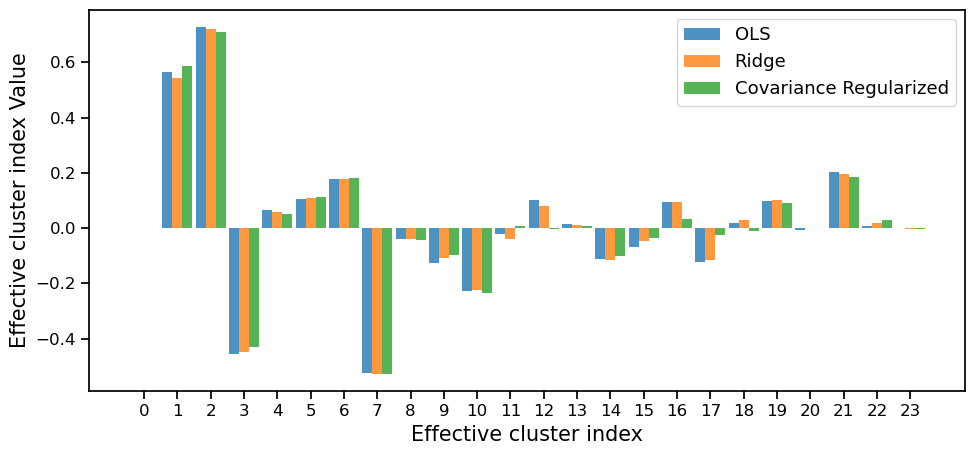

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

X,E,_,_ = standardize_X_E()

radii = df['radius'].to_numpy()  # Access radius attribute
num_sites = df['order'].to_numpy()  # Count the number of sites in each orbit
num_sites[0] = 1  # The first orbit has only one site

# Double check the shapes
print("Radii:", radii, radii.shape)
print("Number of Sites:", num_sites, num_sites.shape)

# Define k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 1: Construct the regularization matrix Lambda
def construct_lambda(gamma, radii, num_sites):
    gamma1, gamma2 = gamma
    diagonal = gamma1 * radii + gamma2 * num_sites
    return np.diag(diagonal) 

# Step 2: Define the loss function (CV-RMSE)
def loss_function(gamma, X, E, kf, radii, num_sites):
    
    # Construct regularization matrix
    Lambda = construct_lambda(gamma, radii, num_sites)

    # Cross-validation
    cv_rmse = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        E_train, E_test = E[train_idx], E[test_idx]

        # Solve for coefficients using training data 
        J_train = np.linalg.inv(X_train.T @ X_train + Lambda) @ X_train.T @ E_train

        # Predict on test data
        E_pred = X_test @ J_train

        # Calculate RMSE for this fold
        train_rmse = np.sqrt(mean_squared_error(E_test, E_pred))
        cv_rmse.append(train_rmse)
        
    #print("Gamma:", gamma, "CV-RMSE:", np.mean(cv_rmse))
    return np.mean(cv_rmse)

# Step 3: Optimize gamma using scipy minimize
initial_gamma = [0.5, 0.5]  # Initial guess for gamma
lower_bounds = 1e-5 # Lower bounds for gamma
higher_bounds = None # Higher bounds for gamma

result = minimize(
    loss_function,
    initial_gamma,
    args=(X, E, kf, radii, num_sites),
    #method="Nelder-Mead",
    bounds=[(lower_bounds, higher_bounds), (lower_bounds, higher_bounds)]
)

optimal_gamma = result.x
print("Optimal Gamma:", optimal_gamma)

# Step 4: Fit the model with optimal gamma
Lambda_opt = construct_lambda(optimal_gamma, radii, num_sites)
J_opt_cov = np.linalg.inv(X.T @ X + Lambda_opt) @ X.T @ E

# Step 5: Compare results
print("Lambda min:", np.min(np.diag(Lambda_opt)))
print("cv_rmse:", result.fun)
print("ECIs for Covariance Regularized Model:", J_opt_cov)

# Step 6: Plot ECIs comparison
indices = np.arange(len(J_opt_cov))
bar_width = 0.3

# Plot OLS, Ridge, and Covariance Regularized ECIs
plt.figure().set_figwidth(10)
plt.bar(indices - bar_width, ols_ecis, bar_width, label="OLS", alpha=0.8)
plt.bar(indices, ridge_ecis, bar_width, label="Ridge", alpha=0.8)
plt.bar(indices + bar_width, J_opt_cov, bar_width, label="Covariance Regularized", alpha=0.8)
plt.xlabel("Effective cluster index")
plt.ylabel("Effective cluster index Value")
plt.xticks(indices)
plt.legend()
plt.tight_layout()
plt.savefig("Comparison_of_ECIs_OLS_vs_Ridge_vs_Covariance_Regularized.pdf")
plt.show()


In [ ]:
# Check the shape of X and Lambda
print("Shape of X:", X.shape)
print("Shape of Lambda:", construct_lambda([1.0, 1.0], radii, num_sites).shape)
print("Diagonal of Lambda:", np.diag(construct_lambda(optimal_gamma, radii, num_sites)))

Shape of X: (52, 24)
Shape of Lambda: (24, 24)
Diagonal of Lambda: [0.05686704 0.05686704 0.31021635 0.39160197 0.45405135 0.50669862
 0.55308179 0.59501538 0.6335773  0.3974793  0.42761519 0.43257748
 0.44530528 0.48416676 0.51067965 0.53087549 0.5340739  0.53971622
 0.56356566 0.58372372 0.62435748 0.46810881 0.48466679 0.50533605]


## Task 4: Bayesian Cluster expansion (4.5p)


A full Bayesian analysis includes the hyperparameters for the prior distribution as parameters to be optimized, which means that they are also sampled and optimized in conjunction with the model parameters. This can be compared to the Covariance approach in Task 3, which finds a single optimal prior distribution.

In this task, you will perform a full Bayesian analysis for the ECIs.

### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$).

We assume homoscedastic errors in this task, and let $\sigma$ be the standard deviation in the likelihood.
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma^2, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) liklihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.

**Discuss:**
* How many parameters seems "necessary" (non-zero) according to your MCMC sampling?
* What would happen if you had set your priors to something "unphysical", for instance to favor 3rd and 4th order clusters very highly?

*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we know and $\sigma$ to be in the range 0.02-2 and $\alpha$ to be in the range 0.05-0.5.

**If you are using `emcee` for the MCMC sampling, please use the following code snippet when defining the sampler.**
This uses the `HDF` backend, which saves the sampling chain to a `.h5`-file instead of keeping it in memory.
This is especially important if you are using the JupyterHub server, as otherwise the memory may fill up, decreasing the performance for everyone using the server.

In [55]:
import emcee
import corner
from scipy.stats import invgamma
#sampler = emcee.EnsembleSampler(backend=emcee.backends.HDFBackend('chain_task3.h5'))

In [81]:
# Define log-likelihood function
def log_likelihood(params, X, E):
    J = params[:-2]  # ECIs
    sigma = params[-2]  # Standard deviation of errors
    if sigma <= 0:
        return -np.inf  # Invalid sigma values
    residuals = E - np.dot(X, J)
    return -0.5 * (len(E) * np.log(2 * np.pi * sigma**2) + np.sum(residuals**2) / sigma**2)

# Define log-prior function
def log_prior(params):
    J = params[:-2]  # ECIs
    sigma = params[-2]
    alpha = params[-1]
    
    if sigma <= 0.02  or sigma >= 2: return -np.inf  # Invalid values
    elif alpha <= 0.05 or alpha >= 0.5: return -np.inf  # Invalid values
        
    # Gaussian prior for ECIs
    log_p_J = -0.5 * len(J) * np.log(2 * np.pi * alpha**2) - np.sum(J**2) / (2 * alpha**2)
    # Inverse gamma priors for sigma and alpha
    log_p_sigma = invgamma.logpdf(sigma, a=1, scale=0.1)
    log_p_alpha = invgamma.logpdf(alpha, a=1, scale=0.1)
    return log_p_J + log_p_sigma + log_p_alpha

# Define log-posterior function
def log_posterior(params, X, E):
    return log_likelihood(params, X, E) + log_prior(params)


In [ ]:
# Load the data
X, E, _, _ = standardize_X_E()

# MCMC Parameters
n_dim = X.shape[1] + 2
n_walkers = 2 * n_dim
n_steps = 100000

# Example ranges for initialization based on the task hints
eci_init = np.random.rand(n_walkers, X.shape[1]) * 0.1
sigma_init = np.random.uniform(0.02, 2, size=(n_walkers, 1))
alpha_init = np.random.uniform(0.05, 0.5, size=(n_walkers, 1))

# Combine all parameters into the initial state
initial_state = np.hstack((eci_init, sigma_init, alpha_init))

# Set up the sampler with HDF backend
backend = emcee.backends.HDFBackend('chain_task4.h5')  # Save chain to file
sampler = emcee.EnsembleSampler(
    nwalkers=n_walkers,
    ndim=n_dim,
    log_prob_fn=log_posterior,
    args=(X, E),
    backend=backend
)

# Run the MCMC
sampler.run_mcmc(initial_state, n_steps, progress=True)


100%|██████████| 100000/100000 [52:21<00:00, 31.83it/s]


State([[-0.34260976  0.67857964  0.71546424 ... -0.01241123  0.07531445
   0.34020153]
 [-0.08230017  0.48502869  0.69670011 ...  0.02619789  0.0816706
   0.3263343 ]
 [-0.03264203  0.42206924  0.76033865 ...  0.01759757  0.07990238
   0.37035139]
 ...
 [ 0.36608079  0.54406083  0.72240937 ... -0.02752278  0.06883444
   0.33008752]
 [-0.62628457  0.6121213   0.73386217 ... -0.01947033  0.06434227
   0.23932503]
 [ 0.1030101   0.50331393  0.76393487 ...  0.00803617  0.07815838
   0.27499082]], log_prob=[59.62380725 61.62429444 52.94005871 58.24237048 58.14017431 64.4946661
 56.272788   58.11253469 55.17420223 65.134994   60.93924832 55.5936754
 51.25857736 63.26883943 59.21774986 58.44242628 66.59244398 61.59380999
 49.39448053 53.2322351  55.31089693 65.84017974 59.9432913  53.10901996
 66.16960159 59.44440126 63.80443169 61.13321235 63.24252091 56.50533435
 64.20252786 61.88875131 55.62189261 54.74952643 54.49868216 60.89537118
 60.14990928 65.49180552 55.84114318 55.41352313 64.86773

Autocorrelation time for each parameter: [539.03794833 606.62405868 896.00459361 674.28981174 613.38697385
 498.79861899 502.17091841 352.83361606 487.53045381 620.77013903
 491.97793863 539.75528061 511.37211787 435.58690634 487.02831999
 499.03883232 516.19729596 516.43164041 537.58748711 466.36475664
 481.57819293 579.11586881 718.99050171 458.03589992 821.80830987
 546.21478133]
Shape of thinned chain: (52, 112, 26)
Shape of flat samples: (4160000, 26)
Shape of flat thinned samples: (4643, 26)


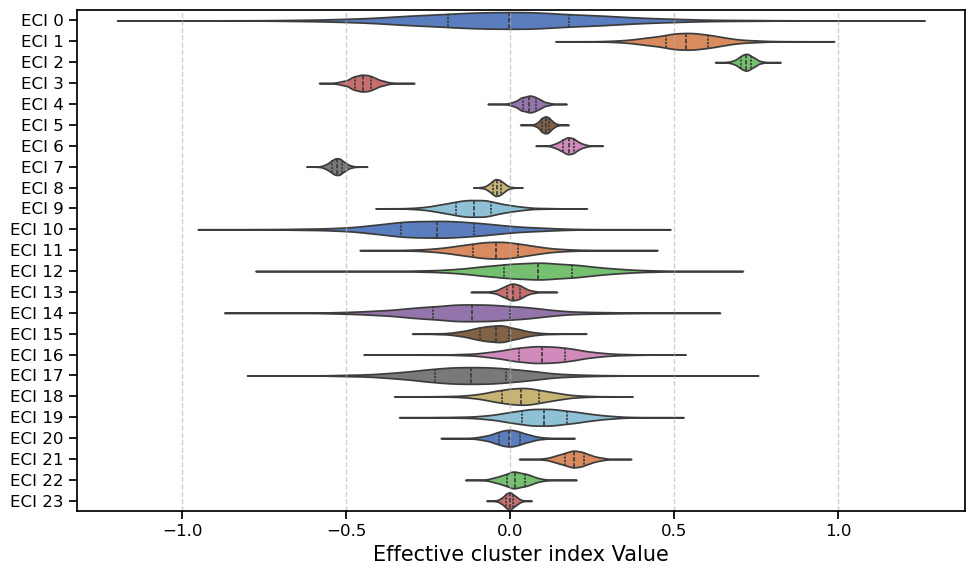

In [ ]:
# Load the chain from the HDF file

filename = "chain_task4_106.h5"
backend = emcee.backends.HDFBackend(filename)

chain_shape = backend.get_chain().shape  # Shape: (nsteps, nwalkers, ndim)
nsteps, nwalkers, ndim = chain_shape

# Access the sampler using the backend
sampler = emcee.EnsembleSampler(nwalkers, ndim, None, backend=backend)

autocorr_time = sampler.get_autocorr_time(tol=0)
print(f"Autocorrelation time for each parameter: {autocorr_time}")

# Use the maximum autocorrelation time across all parameters to determine thinning interval
max_autocorr_time = int(np.max(autocorr_time))

# Thin the chain to ensure uncorrelated samples (every max_autocorr_time-th sample)
thinned_chain = sampler.chain[:, ::max_autocorr_time, :]

print(f"Shape of thinned chain: {thinned_chain.shape}")

burn_in = int(0.2 * sampler.iteration)  # 20% burn-in
flat_samples = sampler.get_chain(discard=burn_in, flat=True)
print(f"Shape of flat samples: {flat_samples.shape}")

flat_thinned_samples = flat_samples[::max_autocorr_time]  # Thinned samples
print(f"Shape of flat thinned samples: {flat_thinned_samples.shape}")

n_params = flat_thinned_samples.shape[1] - 2 # Number of ECIs excluding sigma and alpha
labels = [f"ECI {i}" for i in range(n_params)]
data = [flat_thinned_samples[:,i] for i in range(n_params)]  # Each parameter's samples as a separate list

# Create the violin plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=data, orient='h', inner='quartile', palette='muted', ax=ax)
ax.set_yticks(range(n_params))
ax.set_yticklabels(labels)
ax.set_xlabel("Effective cluster index Value")
ax.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("ViolinPlot_Task4.pdf")
plt.show()

## Task 5: ARDR Feature selection (4p)

The techniques previously studied (Task 2-4) have been rather hands-on in that the user has quite a lot of control over how the parameter priors are constructed and optimized. Automatic Relevance Detection Regression (ARDR) on the other hand offers an automatic approach to optimizing the shape of the parameter priors, through several different shape parameters. In this task you will investigate how ARDR performs while varying a single shape parameter known as `threshold_lambda` in the [scikit-documentation for ARDR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).  


Scan a range of values for the hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

To demonstrate the power of ARDR, increase the cutoffs in the cluster space to `[13,8,6]`, which greatly increases the number of parameters and makes the problem very overdetermined.

**Tasks:**
* Compute the training and CV error for a range of values for `threshold_lambda`.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.   

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Which ECIs are selected here? Is there a difference to OLS/Ridge/Covariance approach?

In [43]:
# Connect to the database and retrieve the primitive cell
db_t5 = connect('AuCu-structures.db')
prim_t5 = db_t5.get(id=1).toatoms()
prim_t5.pbc = True  # Ensure periodic boundary conditions

# Define the new cluster space with larger cutoffs
cs_t5 = icet.ClusterSpace(prim_t5, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])
print(cs_t5)

====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 13.0000 8.0000 6.0000
 total number of parameters             : 104
 number of parameters by order          : 0= 1  1= 1  2= 24  3= 43  4= 35
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
-------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]          |      A  

In [44]:
# Initialize the StructureContainer with the defined ClusterSpace
sc_t5 = icet.StructureContainer(cluster_space=cs_t5)

# Populate the StructureContainer with structures and their mixing energies
for row in db.select():
    atoms = row.toatoms()
    mixing_energy = row.mixing_energy  # Extract mixing energy from the database
    sc_t5.add_structure(atoms, properties={"mixing_energy": mixing_energy})

# Extract features (X) and target (E) for regression
X, E = sc_t5.get_fit_data(key="mixing_energy")
print("Feature matrix (X) shape:", X.shape)
print("Target vector (E) shape:", E.shape)

# Standardize features (X) and target values (E)
def standardize_X_E_task5(X, E):
    # Standardize the target values
    energy_scaler = StandardScaler()
    standardized_E = energy_scaler.fit_transform(E.reshape(-1, 1)).flatten()

    # Standardize the feature matrix
    cluster_scaler = StandardScaler()
    standardized_X = cluster_scaler.fit_transform(X)

    return standardized_X, standardized_E, cluster_scaler, energy_scaler

X_scaled, E_scaled, cluster_scaler_t5, energy_scaler_t5 = standardize_X_E_task5(X, E)
print("Standardized Feature matrix (X) shape:", X_scaled.shape)
print("Standardized Target vector (E) shape:", E_scaled.shape)

# mean and variance of the scaled mixing energies


Feature matrix (X) shape: (52, 104)
Target vector (E) shape: (52,)
Standardized Feature matrix (X) shape: (52, 104)
Standardized Target vector (E) shape: (52,)


In [ ]:
from sklearn.linear_model import ARDRegression

# Define threshold_lambda values for ARDR
threshold_lambda_values = np.linspace(50, 1000, 5000)

# Initialize arrays to store results
training_errors = []
cv_errors = []
num_nonzero_coeffs = []

aic_dict = {}
bic_dict = {}

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Scan over threshold_lambda values
for threshold_lambda in threshold_lambda_values:
    ardr = ARDRegression(threshold_lambda=threshold_lambda)
    
    # Perform custom cross-validation
    cv_error = []
    for train_idx, test_idx in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        E_train, E_test = E_scaled[train_idx], E_scaled[test_idx]
        
        # Train ARDR model on training data
        ardr.fit(X_train, E_train)
        
        # Compute validation error
        predictions = ardr.predict(X_test)
        cv_error.append(mean_squared_error(E_test, predictions))
    
    # Average CV error across folds
    avg_cv_error = np.mean(cv_error)

    # Fit the model on the full dataset and compute training error
    ardr.fit(X_scaled, E_scaled)
    train_error = mean_squared_error(E_scaled, ardr.predict(X_scaled))
    
    # Count the number of non-zero coefficients
    nonzero_coeffs = np.sum(np.abs(ardr.coef_) > 0)
    
    # Compute AIC and BIC
    n_samples, n_features = X_scaled.shape
    rss = np.sum((E_scaled - ardr.predict(X_scaled)) ** 2)
    aic = n_samples * np.log(rss / n_samples) + 2 * nonzero_coeffs
    bic = n_samples * np.log(rss / n_samples) + nonzero_coeffs * np.log(n_samples)
    
    # Store results
    training_errors.append(train_error)
    cv_errors.append(avg_cv_error)
    num_nonzero_coeffs.append(nonzero_coeffs)
    
    # Store AIC and BIC values
    if nonzero_coeffs not in aic_dict or aic < aic_dict[nonzero_coeffs]:
        aic_dict[nonzero_coeffs] = aic
    if nonzero_coeffs not in bic_dict or bic < bic_dict[nonzero_coeffs]:
        bic_dict[nonzero_coeffs] = bic


# Identify the optimal threshold_lambda
optimal_threshold_lambda = threshold_lambda_values[np.argmin(cv_errors)]
print(f"Optimal Threshold Lambda: {optimal_threshold_lambda}")

# Fit the final ARDR model with the optimal threshold_lambda
ardr_optimal = ARDRegression(threshold_lambda=optimal_threshold_lambda)
ardr_optimal.fit(X_scaled, E_scaled)

# Identify selected features
selected_features = np.where(np.abs(ardr_optimal.coef_) > 0)[0]
print(f"Number of Selected Features: {len(selected_features)}")
print(f"Selected Feature Indices: {selected_features}")

Optimal Threshold Lambda: 686.627325465093
Number of Selected Features: 11
Selected Feature Indices: [ 1  2  3  5  6  7 27 76 84 85 88]


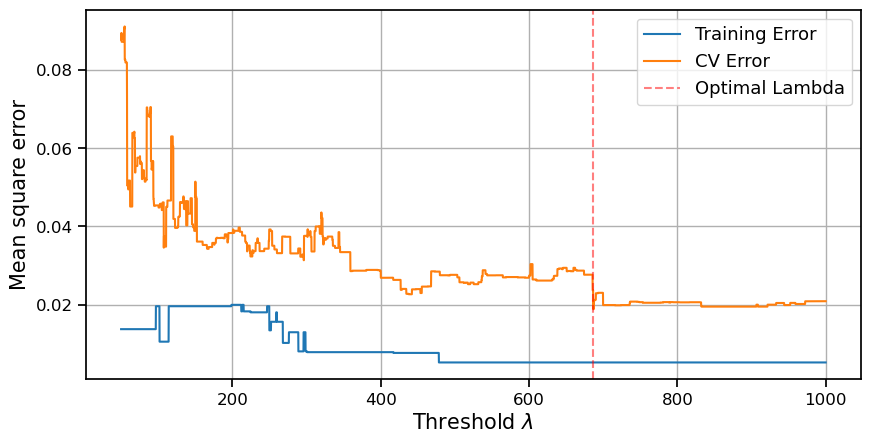

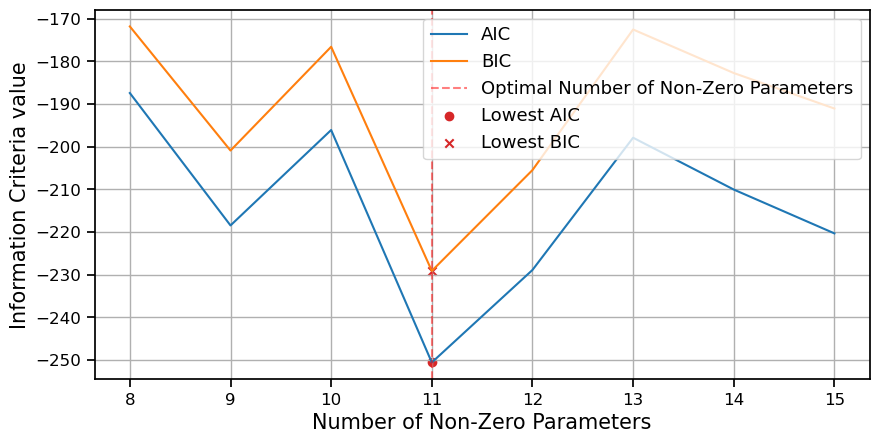

In [ ]:
# Sort AIC and BIC values by number of non-zero coefficients
sorted_nonzero_coeffs = sorted(aic_dict.keys())
sorted_aic = np.array([aic_dict[k] for k in sorted_nonzero_coeffs])
sorted_bic = np.array([bic_dict[k] for k in sorted_nonzero_coeffs])

# Find the minimum AIC and BIC values
min_aic_value = np.min(sorted_aic)
min_bic_value = np.min(sorted_bic)
min_aic_coeffs = sorted_nonzero_coeffs[np.argmin(sorted_aic)]
min_bic_coeffs = sorted_nonzero_coeffs[np.argmin(sorted_bic)]

# Plot Training and CV Error vs Threshold Lambda
plt.figure().set_figwidth(10)
plt.plot(threshold_lambda_values, training_errors, label="Training Error")
plt.plot(threshold_lambda_values, cv_errors, label="CV Error")
plt.axvline(optimal_threshold_lambda, color="red", linestyle="--",alpha=0.5, label="Optimal Lambda")
plt.xlabel(r"Threshold $\lambda$")
plt.ylabel("Mean square error")
plt.legend()
plt.grid()
plt.savefig("Training_and_CV_Error_vs_Threshold_Lambda.pdf")
plt.show()

# Plot AIC/BIC vs number of non-zero parameters
plt.figure().set_figwidth(10)
plt.plot(sorted_nonzero_coeffs, sorted_aic, label="AIC")
plt.plot(sorted_nonzero_coeffs, sorted_bic, label="BIC")
plt.axvline(len(selected_features), color="red", linestyle="--",alpha=0.5, label="Optimal Number of Non-Zero Parameters")
plt.scatter(min_aic_coeffs,min_aic_value, color='tab:red', marker='o', label="Lowest AIC")
plt.scatter(min_bic_coeffs,min_bic_value, color='tab:red', marker='x', label="Lowest BIC")
plt.xlabel("Number of Non-Zero Parameters")
plt.ylabel("Information Criteria value")
plt.legend(loc='upper right')
plt.grid()
plt.savefig("AIC_and_BIC_vs_Number_of_Non_Zero_Parameters.pdf")
plt.show()

## Task 6: The ground state (3p)

In this final task, you will compare all the earlier techniques (Tasks 2-5) in predicting the ground state of candidate clusters.The ground-state structure refers to the structure with the lowest energy for a given concentration. Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `ground_states_candidates.db` you will find potential ground-state candidates. In this task you will assign each ground-state candidate in the database an estimated energy, and use your results from task 4 to estimate the probability of each candidate being the actual ground-state.

**Tasks:**
* Use the models that you've studied in Tasks 2-5 to predict the ground state structure and energy.
    * From Task 2, use OLS and the RIDGE model with optimal hyperparameter that you found.
    * From Task 3, use the optimal Covariance model that you found.
    * From Task 4, use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
        * Also plot the disitrubtion of the ground-state energy.
    * From Task 5, use the ARDR model with the optimal hyperparameter that you found.
* Compare the results from predicting the ground state with Task 2-5 and discuss the results.

**Discuss:**
* Can you spot any differences between the models in predicting the ground state? Why/why not?
* Which model approach do you think is the most suitable for this problem? (No right or wrong answer here; it's the discussion that's important)
    * In particular elaborate on the differences between automatic feature selection (such as Ridge/ARDR) and more hands-on, physical intuition based approaches (such as Covariance/Full Bayesian).

*Hints*
* Remember that the ECIs have previously been normalized. You will thus have to normalize the ground state candidate cluster vectors and transform the predicted energies back to the original energy scale.

OLS Ground State ID: 4
Ridge Ground State ID: 4
Covariance Ground State ID: 29
Bayesian Ground State ID: 4
ARDR Ground State ID: 4


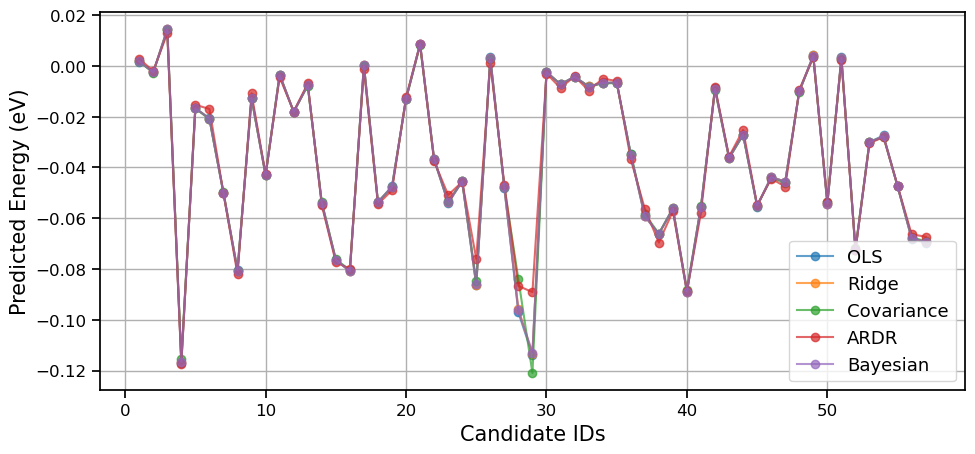

In [ ]:
# Step 1: Load the ground state candidates
db_candidates = connect('ground-state-candidates.db')
candidate_cluster_vectors_t2_4 = []
candidate_cluster_vectors_t5 = []
candidate_ids = []

# Extract cluster vectors from the database
for row in db_candidates.select():
    atoms = row.toatoms()
    candidate_cluster_vectors_t2_4.append(cs.get_cluster_vector(atoms))  # Task 1–4 cluster space
    candidate_cluster_vectors_t5.append(cs_t5.get_cluster_vector(atoms))  # Task 5 cluster space
    candidate_ids.append(row.id)

# Convert to numpy arrays
candidate_cluster_vectors_t2_4 = np.array(candidate_cluster_vectors_t2_4)
candidate_cluster_vectors_t5 = np.array(candidate_cluster_vectors_t5)

# Step 2: Normalize cluster vectors
candidate_cluster_vectors_scaled_t2_4 = cluster_scaler.transform(candidate_cluster_vectors_t2_4)  # Tasks 1–4
candidate_cluster_vectors_scaled_t5 = cluster_scaler_t5.transform(candidate_cluster_vectors_t5)  # Task 5

# Step 3: Predict energies for each model
# OLS Prediction (Task 2)
ols_predicted_energies = np.dot(candidate_cluster_vectors_scaled_t2_4, ols_ecis)
ols_predicted_energies = energy_scaler.inverse_transform(ols_predicted_energies.reshape(-1, 1)).flatten()

# Ridge Prediction (Task 2)
ridge_predicted_energies = np.dot(candidate_cluster_vectors_scaled_t2_4, ridge_ecis)
ridge_predicted_energies = energy_scaler.inverse_transform(ridge_predicted_energies.reshape(-1, 1)).flatten()

# Covariance Prediction (Task 3)
cov_predicted_energies = np.dot(candidate_cluster_vectors_scaled_t2_4, J_opt_cov)
cov_predicted_energies = energy_scaler.inverse_transform(cov_predicted_energies.reshape(-1, 1)).flatten()

# Bayesian Prediction (Task 4)
flat_thinned_samples_mean = np.mean(flat_thinned_samples,axis=0)
bayesian_predicted_energies = [
    np.dot(candidate_cluster_vectors_scaled_t2_4, flat_thinned_samples_mean[:-2])
]

bayesian_predicted_energies = energy_scaler.inverse_transform(
    np.array(bayesian_predicted_energies).T
)

# ARDR Prediction (Task 5)
ardr_predicted_energies = np.dot(candidate_cluster_vectors_scaled_t5, ardr_optimal.coef_)
ardr_predicted_energies = energy_scaler_t5.inverse_transform(ardr_predicted_energies.reshape(-1, 1)).flatten()


# Step 4: Identify the ground state for each model
ols_ground_state = candidate_ids[np.argmin(ols_predicted_energies)]
ridge_ground_state = candidate_ids[np.argmin(ridge_predicted_energies)]
cov_ground_state = candidate_ids[np.argmin(cov_predicted_energies)]
bayesian_ground_state = candidate_ids[np.argmin(bayesian_predicted_energies)]
ardr_ground_state = candidate_ids[np.argmin(ardr_predicted_energies)]

# Step 5: Compare Results
print("OLS Ground State ID:", ols_ground_state)
print("Ridge Ground State ID:", ridge_ground_state)
print("Covariance Ground State ID:", cov_ground_state)
print("Bayesian Ground State ID:", bayesian_ground_state)
print("ARDR Ground State ID:", ardr_ground_state)

# Step 6: Plot Model Predictions
plt.figure().set_figwidth(10)
plt.plot(candidate_ids, ols_predicted_energies, 'o-', label="OLS", alpha=0.7)
plt.plot(candidate_ids, ridge_predicted_energies, 'o-', label="Ridge", alpha=0.7)
plt.plot(candidate_ids, cov_predicted_energies, 'o-', label="Covariance", alpha=0.7)
plt.plot(candidate_ids, ardr_predicted_energies, 'o-', label="ARDR", alpha=0.7)
plt.plot(candidate_ids, bayesian_predicted_energies, 'o-', label="Bayesian", alpha=0.7)
plt.xlabel("Candidate IDs")
plt.ylabel("Predicted Energy (eV)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Model_Predictions.pdf")
plt.show()

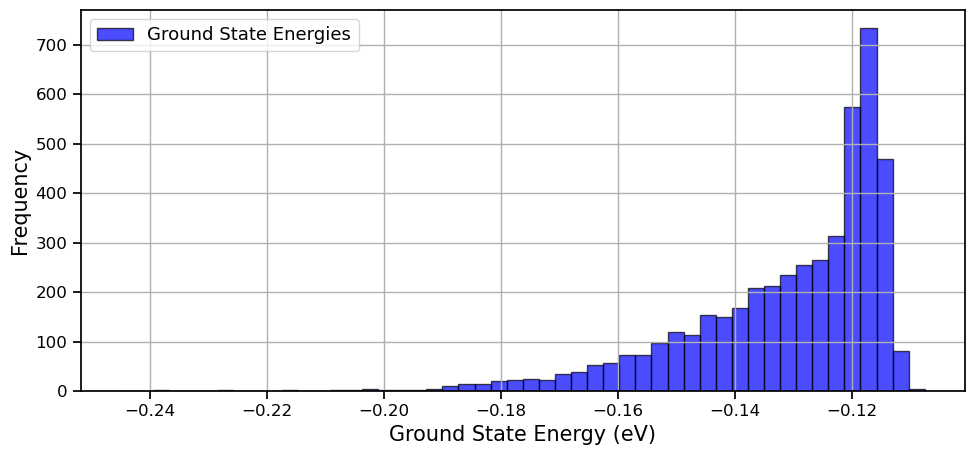

In [ ]:
# Step 1: Initialize an array to store the energies of identified ground states
ground_state_energies = []

# Step 2: Loop through each MCMC sample to calculate the predicted energies
for sample in flat_thinned_samples:
    # Predict energies for each candidate structure
    predicted_energies = np.dot(candidate_cluster_vectors_scaled_t2_4, sample[:-2])  # Exclude last 2 entries from sample
    
    # Find the energy of the candidate with the minimum energy (ground state)
    ground_state_energy = np.min(predicted_energies)
    
    # Append the ground state energy to the list
    ground_state_energies.append(ground_state_energy)

# Step 3: Convert list to numpy array for easier handling
ground_state_energies = np.array(ground_state_energies)

ground_state_energies = energy_scaler.inverse_transform(
    np.array(ground_state_energies).reshape(-1, 1)
).flatten()

# Step 4: Plot the distribution of ground state energies
plt.figure().set_figwidth(10)
plt.hist(ground_state_energies, bins=50, color="blue", edgecolor="black", alpha=0.7, label="Ground State Energies")
plt.xlabel("Ground State Energy (eV)")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Distribution_of_Ground_State_Energies.pdf")
plt.show()


In [ ]:
# Step 1: Initialize a list to track the count of each candidate being the ground state
ground_state_counts = np.zeros(len(candidate_ids))  # Initialize count array

# Step 2: Loop through each MCMC sample to calculate the predicted energies
for sample in flat_thinned_samples:
    # Predict energies for each candidate structure using the parameters from the current sample
    predicted_energies = np.dot(candidate_cluster_vectors_scaled_t2_4, sample[:-2])  # Exclude last 2 entries from sample

    # Convert the predicted energies back to the original scale
    predicted_energies = energy_scaler.inverse_transform(np.array(predicted_energies).reshape(-1, 1)).flatten()

    # Find the energy of the candidate with the minimum energy (ground state)
    ground_state_index = np.argmin(predicted_energies)  # Index of the candidate with the lowest energy
    
    # Increment the count for that candidate being the ground state
    ground_state_counts[ground_state_index] += 1

# Step 3: Normalize the counts to get the frequency (probability) for each candidate being the ground state
total_samples = len(flat_thinned_samples)
ground_state_frequencies = ground_state_counts / total_samples  # Frequency = Count / Total samples

# Step 4: Output the frequencies for each candidate
for i, candidate_id in enumerate(candidate_ids):
    if ground_state_frequencies[i] > 0:
        print(f"Candidate {candidate_id} Ground State Frequency: {ground_state_frequencies[i]:.4f}")


Candidate 4 Ground State Frequency: 0.3067
Candidate 28 Ground State Frequency: 0.2432
Candidate 29 Ground State Frequency: 0.4501
